In [ ]:
# 元ファイルとしては、dataset_1_v2.ipynb

In [1]:
import pandas as pd
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from itertools import combinations

import networkx as nx
import igraph as ig
import leidenalg
# import cudf
# import cugraph

np.random.seed(42)

In [2]:
# unique_users_per_year.to_pickle("./pickle_data/unique_users_per_year.pkl")
unique_users_per_year = pd.read_pickle("./pickle_data/unique_users_per_year.pkl")

Default palette: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


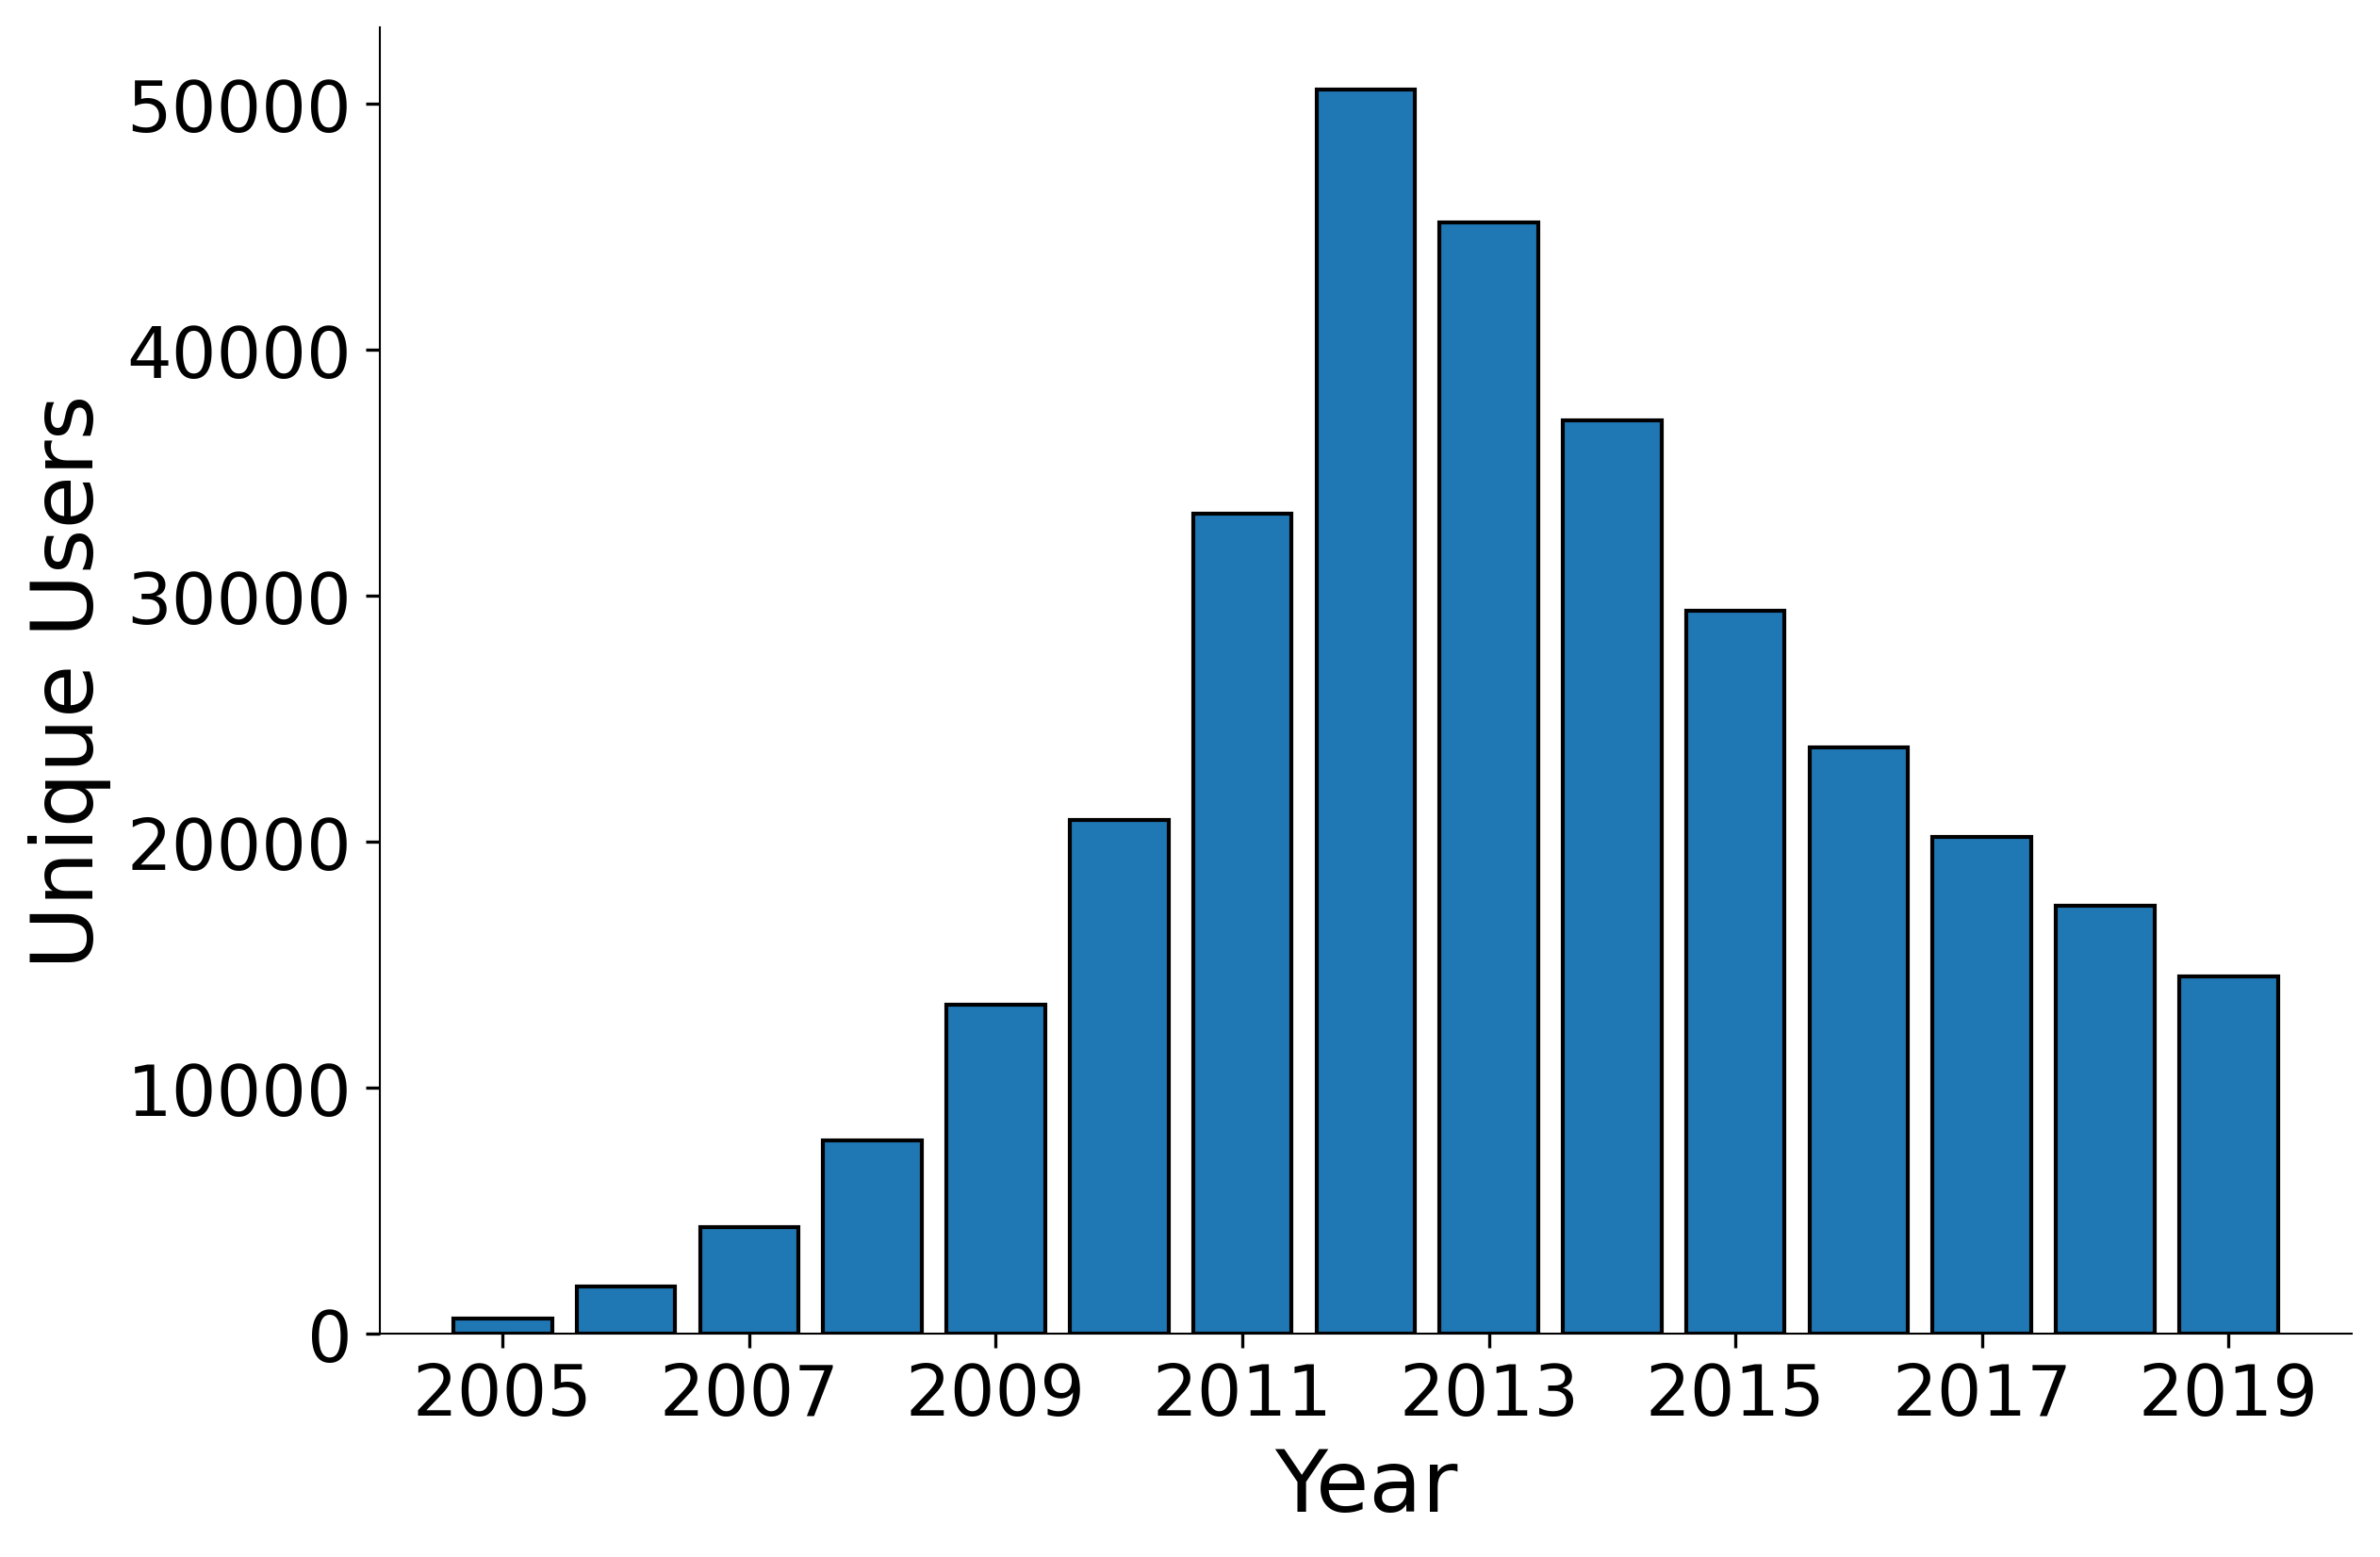

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# プロットスタイル/フォントサイズ等の設定
plt.rcParams['figure.dpi'] = 300
plt.style.use(['nature'])  # ['science'] から ['nature'] など好みに合わせて
plt.rc('axes', titlesize=22, labelsize=22)  # タイトル・軸ラベルのサイズ
plt.rc('xtick', labelsize=18)               # X軸目盛りの文字サイズ
plt.rc('ytick', labelsize=18)               # Y軸目盛りの文字サイズ
plt.rc('legend', fontsize=13)               # 凡例文字サイズ

# カラーパレットの確認（デフォルト）
print("Default palette:", plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Figure, Axesの作成
fig, ax = plt.subplots(figsize=(9, 6))  
# ↑ 他の縦横比にしたい場合は適宜変更してください (例: (8,4) など)

# 棒グラフを描画
# colorにはデフォルトカラーパレットの1色目を使う
ax.bar(
    unique_users_per_year['Year'], 
    unique_users_per_year['Unique Users'], 
    width=0.8, 
    edgecolor='black', 
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
)

# タイトルはオフにしているので必要ならコメント解除
# ax.set_title('Yearly Unique Users', fontsize=20)

# 軸ラベル設定
ax.set_xlabel('Year', fontsize=22)
ax.set_ylabel('Unique Users', fontsize=22)

# 軸線や目盛りの調整
ax.spines[['right', 'top']].set_visible(False)  
ax.tick_params(which='both', top=False, right=False)

# X, Y軸目盛
ax.set_xticks(unique_users_per_year['Year'])
ax.set_xticklabels(unique_users_per_year['Year'], rotation=0)
ax.set_xticks(range(2005, 2020, 2))  # 2年ごとの目盛りに変更
ax.set_xlim(2004, 2020)
# Y目盛はデフォルトのまま


# 保存と表示
#plt.savefig("unique_user.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("unique_user.eps", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
# country_counts_unique.to_pickle("./pickle_data/country_counts_unique.pkl")
country_counts_unique = pd.read_pickle("./pickle_data/country_counts_unique.pkl")

Default palette: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


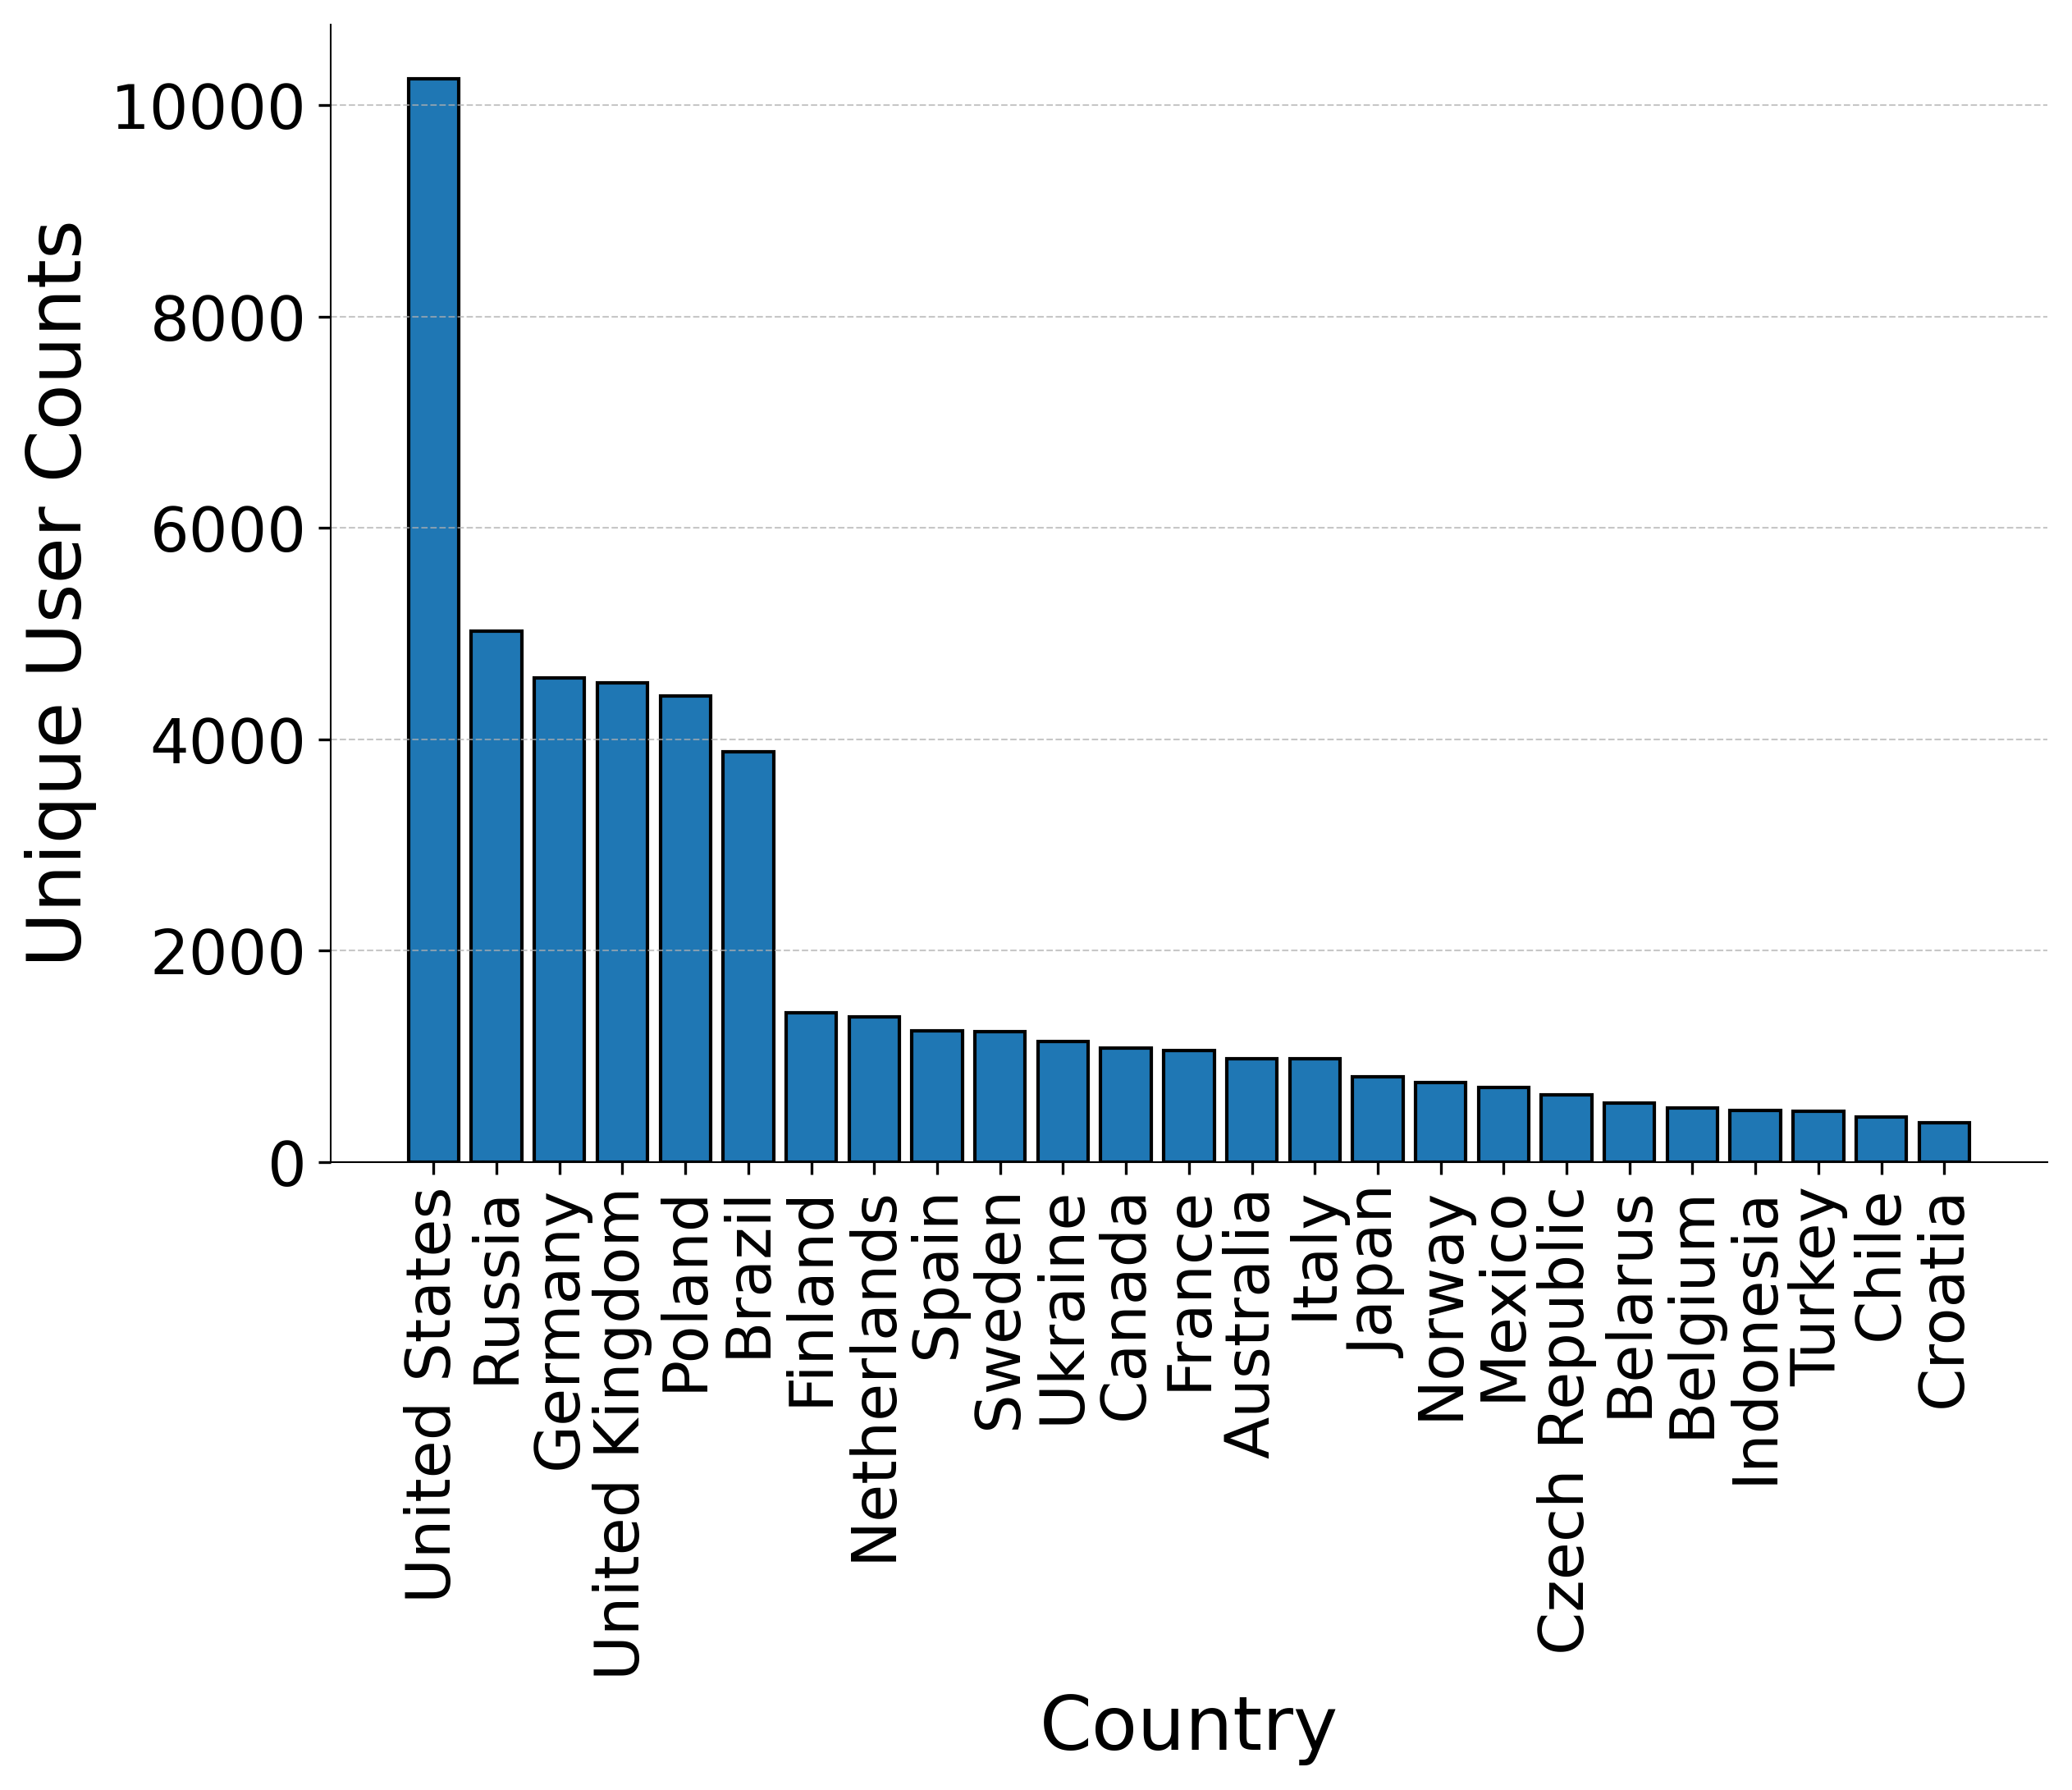

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# プロットスタイル/フォントサイズ等の設定
plt.rcParams['figure.dpi'] = 300
plt.style.use(['nature'])  # ['science'] から ['nature'] など好みに合わせて
plt.rc('axes', titlesize=22, labelsize=22)  # タイトル・軸ラベルのサイズ
plt.rc('xtick', labelsize=18)               # X軸目盛りの文字サイズ
plt.rc('ytick', labelsize=18)               # Y軸目盛りの文字サイズ
plt.rc('legend', fontsize=13)               # 凡例文字サイズ

# カラーパレットの確認（デフォルト）
print("Default palette:", plt.rcParams['axes.prop_cycle'].by_key()['color'])

# 上位25カ国を抽出
th = 25
top_th_countries = country_counts_unique.head(th)

# -----------------------------
# 2) グラフ描画
# -----------------------------
fig, ax = plt.subplots(figsize=(9, 6))

# 棒グラフを描画
ax.bar(
    top_th_countries.index,
    top_th_countries.values,
    edgecolor='black',
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
)

# 軸ラベル設定
ax.set_xlabel('Country', fontsize=22)
ax.set_ylabel('Unique User Counts', fontsize=22)

# 軸線や目盛りの調整
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(which='both', top=False, right=False)

# X軸目盛り：国名を垂直に表示
ax.set_xticks(range(len(top_th_countries)))
ax.set_xticklabels(top_th_countries.index, rotation=90, ha='center')

# グリッド (Y軸のみ点線)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 画像として保存 & 表示
plt.show()

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
with open(r'/disks/qnap2/notebook/t-nakamura/research_lastfm/data/listening_events_20050214_20200320_fin.pkl', 'rb') as f:
    df_listen_event = pickle.load(f)
print(df_listen_event.shape)
df_listen_event.head(2)

In [3]:
# ユニークな 'track_id' の行を抽出
unique_tracks = df_listen_event.drop_duplicates(subset='track_id')

# ユニークな行数を確認
unique_tracks_count = unique_tracks.shape[0]
print(f"ユニークな track_id の数: {unique_tracks_count}")

ユニークな track_id の数: 1637128


In [4]:
# 各ジャンルの個数をカウント
tag_counts = unique_tracks["top_tag"].value_counts()

# 上位10ジャンルまで抽出、それ以外を "other" にまとめる
top_10 = tag_counts.head(20)
others_count = tag_counts.iloc[20:].sum()

# "other" を追加したデータフレームを作成
summary_df = pd.concat([top_10, pd.Series({"other": others_count})])

## 読み込む場合はここから

In [8]:
# summary_df.to_pickle("./pickle_data/summary_df.pkl")
summary_df = pd.read_pickle("./pickle_data/summary_df.pkl")

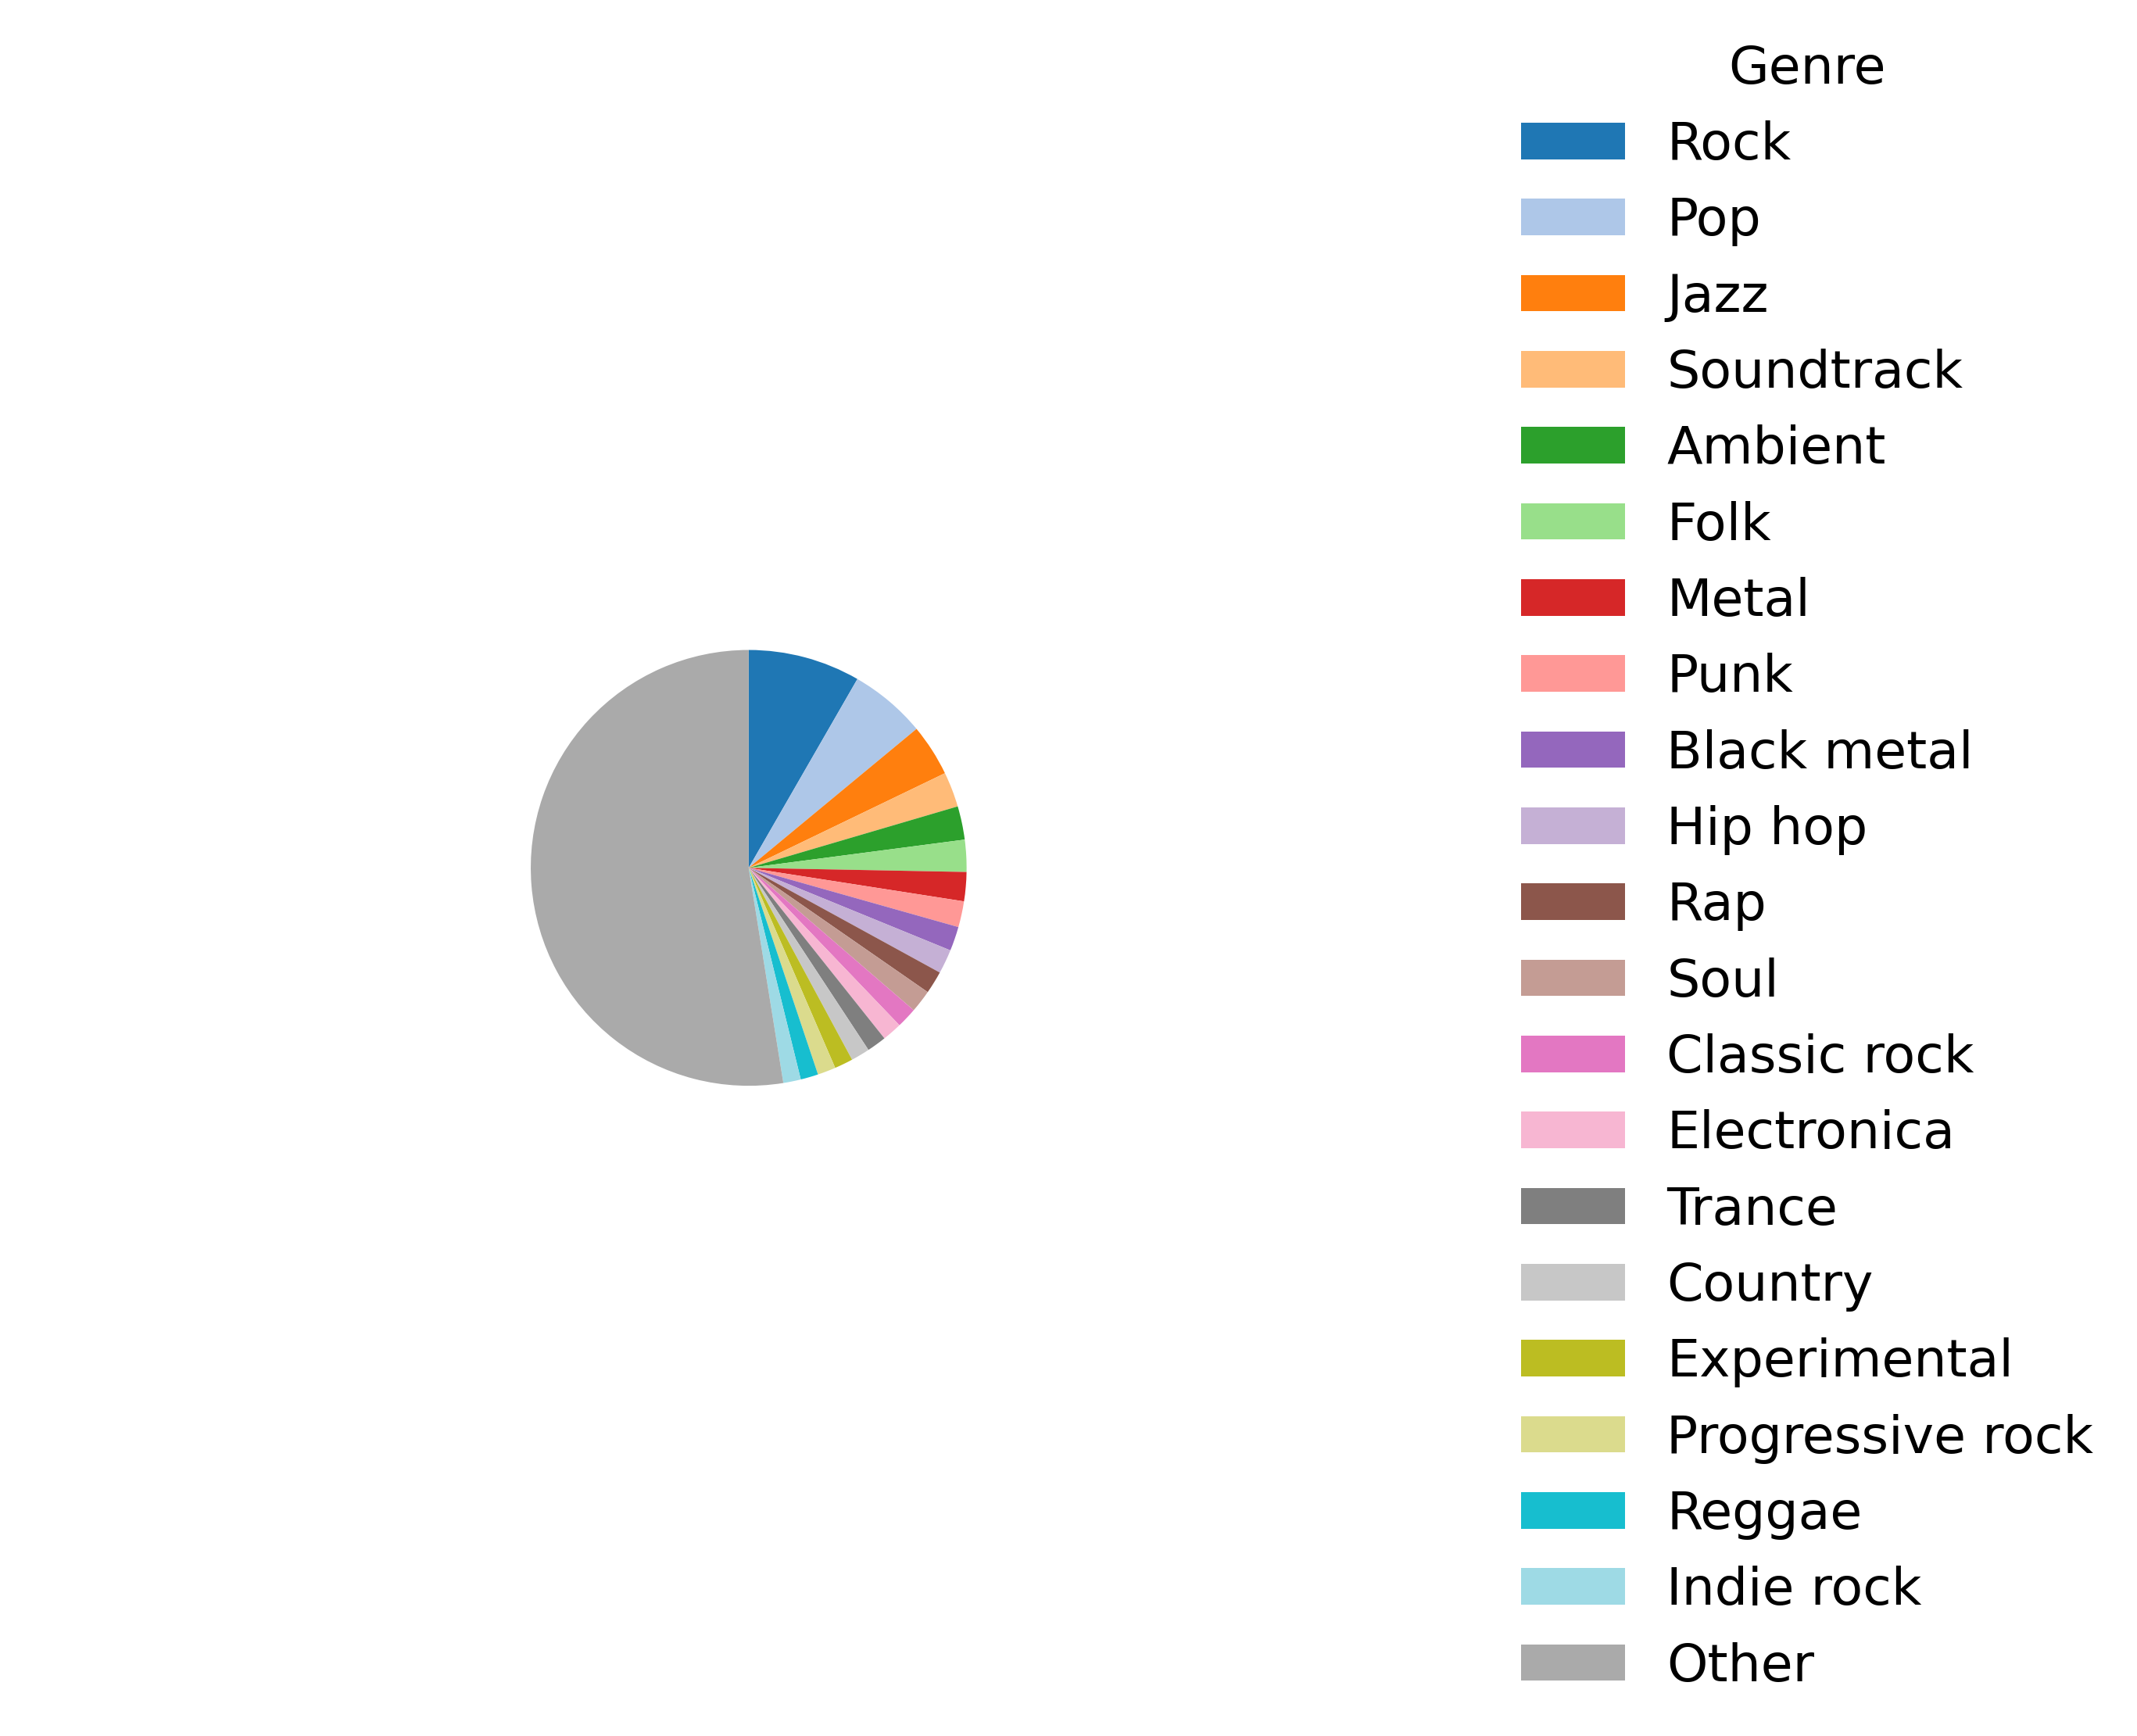

In [5]:
# ── 0. 必要ライブラリ ───────────────────────────────
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.rcParams['figure.dpi'] = 300
plt.style.use(['nature'])

# ── 1. summary_df が既にある前提 ────────────────────
# summary_df = pd.Series(...)

# ── 2. “other” を末尾に回した順序付き Series を作成 ─────
is_other = summary_df.index.str.lower() == 'other'
summary_df_ord = pd.concat([summary_df[~is_other], summary_df[is_other]])

# ── 3. ラベル整形 ──────────────────────────────────
labels = [lbl.replace("_", " ").capitalize() for lbl in summary_df_ord.index]


# ── 4. カラー設定（tab20 + tab20b + tab20c → other だけ #aaaaaa） ──
base_colors = (
    list(plt.cm.tab20.colors)  +
    list(plt.cm.tab20b.colors) +
    list(plt.cm.tab20c.colors)
)
final_colors = [
    "#aaaaaa" if key.lower() == "other" else base_colors[i]
    for i, key in enumerate(summary_df_ord.index)
]

# ── 5. プロット ──────────────────────────────────
fig, ax = plt.subplots(figsize=(9, 6), layout="constrained")

wedges, texts = ax.pie(
    summary_df_ord,
    # autopct なし → %表示を消す
    startangle=90,
    counterclock=False,          # 時計回り
    colors=final_colors,
    textprops={'fontsize': 10}
)

ax.legend(
    wedges, labels,
    title="Genre",
    loc="center left", bbox_to_anchor=(1, 0.5),
    frameon=False,
    prop={'size': 16},           # 凡例ラベル大
    title_fontsize=16           # 凡例タイトル大
)

ax.axis('equal')                 # 真円
#plt.savefig("tag_percentage_circle.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("tag_percentage_circle.eps", dpi=300, bbox_inches='tight')
plt.show()